# Data Collection & Preparation

## Importing the librariess

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier 
import xgboost
import pickle as pkl
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ("ignore")

## Read the Datasets

In [5]:
train = pd.read_csv('panic_disorder_dataset_training.csv')
train.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


In [6]:
test = pd.read_csv('panic_disorder_dataset_testing.csv')
test.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,NaN,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,NaN,Seeking therapy,Low,Exercise,0


In [7]:
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)

Train data shape: (100000, 17)
Test data shape: (20000, 17)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Participant ID            20000 non-null  int64 
 1   Age                       20000 non-null  int64 
 2   Gender                    20000 non-null  object
 3   Family History            20000 non-null  object
 4   Personal History          20000 non-null  object
 5   Current Stressors         20000 non-null  object
 6   Symptoms                  20000 non-null  object
 7   Severity                  20000 non-null  object
 8   Impact on Life            20000 non-null  object
 9   Demographics              20000 non-null  object
 10  Medical History           14999 non-null  object
 11  Psychiatric History       15011 non-null  object
 12  Substance Use             13383 non-null  object
 13  Coping Mechanisms         20000 non-null  object
 14  Social Support        

## Handling Missing Value

In [11]:
train.isnull().sum()

Participant ID                  0
Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             25173
Psychiatric History         24921
Substance Use               33374
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64

In [12]:
test.isnull().sum()

Participant ID                 0
Age                            0
Gender                         0
Family History                 0
Personal History               0
Current Stressors              0
Symptoms                       0
Severity                       0
Impact on Life                 0
Demographics                   0
Medical History             5001
Psychiatric History         4989
Substance Use               6617
Coping Mechanisms              0
Social Support                 0
Lifestyle Factors              0
Panic Disorder Diagnosis       0
dtype: int64

In [13]:
train.isnull().any()

Participant ID              False
Age                         False
Gender                      False
Family History              False
Personal History            False
Current Stressors           False
Symptoms                    False
Severity                    False
Impact on Life              False
Demographics                False
Medical History              True
Psychiatric History          True
Substance Use                True
Coping Mechanisms           False
Social Support              False
Lifestyle Factors           False
Panic Disorder Diagnosis    False
dtype: bool

In [14]:
test.isnull().any()

Participant ID              False
Age                         False
Gender                      False
Family History              False
Personal History            False
Current Stressors           False
Symptoms                    False
Severity                    False
Impact on Life              False
Demographics                False
Medical History              True
Psychiatric History          True
Substance Use                True
Coping Mechanisms           False
Social Support              False
Lifestyle Factors           False
Panic Disorder Diagnosis    False
dtype: bool

In [15]:
train["Medical History"].unique()

array(['Diabetes', 'Asthma', nan, 'Heart disease'], dtype=object)

In [16]:
train["Psychiatric History"].unique()

array(['Bipolar disorder', 'Anxiety disorder', 'Depressive disorder', nan],
      dtype=object)

In [17]:
train["Substance Use"].unique()

array([nan, 'Drugs', 'Alcohol'], dtype=object)

In [18]:
test["Medical History"].unique()

array(['Diabetes', 'Asthma', 'Heart disease', nan], dtype=object)

In [19]:
test["Psychiatric History"].unique()

array(['Bipolar disorder', 'Anxiety disorder', 'Depressive disorder', nan],
      dtype=object)

In [20]:
test["Substance Use"].unique()

array(['Alcohol', 'Drugs', nan], dtype=object)

### Fill null values

In [22]:
train["Medical History"].fillna("none", inplace=True)
train["Medical History"].unique()

array(['Diabetes', 'Asthma', 'none', 'Heart disease'], dtype=object)

In [23]:
train["Psychiatric History"].fillna("none", inplace=True)
train["Psychiatric History"].unique()

array(['Bipolar disorder', 'Anxiety disorder', 'Depressive disorder',
       'none'], dtype=object)

In [24]:
train["Substance Use"].fillna("none", inplace=True)
train["Substance Use"].unique()

array(['none', 'Drugs', 'Alcohol'], dtype=object)

In [25]:
test["Medical History"].fillna("none", inplace=True)
test["Medical History"].unique()

array(['Diabetes', 'Asthma', 'Heart disease', 'none'], dtype=object)

In [26]:
test["Psychiatric History"].fillna("none", inplace=True)
test["Psychiatric History"].unique()

array(['Bipolar disorder', 'Anxiety disorder', 'Depressive disorder',
       'none'], dtype=object)

In [27]:
test["Substance Use"].fillna("none", inplace=True)
test["Substance Use"].unique()

array(['Alcohol', 'Drugs', 'none'], dtype=object)

### Checking null values again

In [29]:
train.isnull().any()

Participant ID              False
Age                         False
Gender                      False
Family History              False
Personal History            False
Current Stressors           False
Symptoms                    False
Severity                    False
Impact on Life              False
Demographics                False
Medical History             False
Psychiatric History         False
Substance Use               False
Coping Mechanisms           False
Social Support              False
Lifestyle Factors           False
Panic Disorder Diagnosis    False
dtype: bool

In [30]:
test.isnull().any()

Participant ID              False
Age                         False
Gender                      False
Family History              False
Personal History            False
Current Stressors           False
Symptoms                    False
Severity                    False
Impact on Life              False
Demographics                False
Medical History             False
Psychiatric History         False
Substance Use               False
Coping Mechanisms           False
Social Support              False
Lifestyle Factors           False
Panic Disorder Diagnosis    False
dtype: bool

## Handling Categorical Values

In [32]:
#categorical values
cat_cols=[]
for i in train.columns:
    if train[i].dtype=='object':
        cat_cols.append(i)
cat_cols

['Gender',
 'Family History',
 'Personal History',
 'Current Stressors',
 'Symptoms',
 'Severity',
 'Impact on Life',
 'Demographics',
 'Medical History',
 'Psychiatric History',
 'Substance Use',
 'Coping Mechanisms',
 'Social Support',
 'Lifestyle Factors']

In [33]:
#Label Encoding
le={}
for column in train.columns:
    if train[column].dtype== object:
        le[column]={}
        c=0
        
        for i in train[column].unique():
            le[column][i]=c
            c+=1
        train[column]=train[column].map(le[column])

le={}
for column in test.columns:
    if test[column].dtype== object:
        le[column]={}
        c=0
        
        for i in test[column].unique():
            le[column][i]=c
            c+=1
        test[column]=test[column].map(le[column])

## SMOTE on Panic Disorder Diagnosis - Over Sampling The Data

In [35]:
train["Panic Disorder Diagnosis"].value_counts()

Panic Disorder Diagnosis
0    95715
1     4285
Name: count, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [37]:
y = train["Panic Disorder Diagnosis"]
x = train.drop(columns=['Participant ID','Panic Disorder Diagnosis'],axis=1)

In [38]:
x_res,y_res = smote.fit_resample(x,y)

In [39]:
print(y.value_counts())
print(y_res.value_counts())

Panic Disorder Diagnosis
0    95715
1     4285
Name: count, dtype: int64
Panic Disorder Diagnosis
0    95715
1    95715
Name: count, dtype: int64


In [40]:
x_res

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51,0,0,1,1,1,0,0,1,1,1,1,1,0,0
2,32,1,1,1,1,1,0,1,1,0,2,0,2,1,1
3,64,1,0,1,0,2,1,2,0,0,3,0,3,0,1
4,31,0,1,1,0,1,0,2,0,1,3,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191425,52,0,1,0,1,0,1,1,0,0,1,0,2,0,0
191426,26,0,1,1,1,3,2,0,0,1,0,0,2,0,0
191427,26,1,1,1,1,4,1,1,0,0,2,0,3,2,0
191428,50,1,1,1,1,1,1,1,0,1,2,1,1,2,0


In [41]:
y_res

0         0
1         0
2         0
3         0
4         0
         ..
191425    1
191426    1
191427    1
191428    1
191429    1
Name: Panic Disorder Diagnosis, Length: 191430, dtype: int64

## Feature Selection

In [43]:
#Calculating Fscore and p value
f_p_values=chi2(x_res,y_res)
f_p_values
# Here first array has F values and second array has P values.

(array([9.99662681e+01, 3.48963177e+03, 7.54854861e+01, 1.50824305e+04,
        7.51868398e+02, 7.11459638e+03, 2.62511594e+03, 8.72140841e+02,
        7.86209399e+03, 2.93563681e+03, 4.76440734e+03, 4.13362985e+02,
        8.29192066e+01, 2.04364449e+02, 1.00259000e+05]),
 array([1.55014829e-023, 0.00000000e+000, 3.68102781e-018, 0.00000000e+000,
        1.57450951e-165, 0.00000000e+000, 0.00000000e+000, 1.11730772e-191,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 6.79357164e-092,
        8.54766017e-020, 2.33056591e-046, 0.00000000e+000]))

In [44]:
#p Values
p_values=pd.Series(f_p_values[1])
p_values. index= x.columns
p_values.sort_index(ascending=True)
# We sort the P values array based on the Chi scores and select moderately important and least important feature/s.

Age                     1.550148e-23
Coping Mechanisms       8.547660e-20
Current Stressors      1.574510e-165
Demographics            0.000000e+00
Family History          3.681028e-18
Gender                  0.000000e+00
Impact on Life         1.117308e-191
Lifestyle Factors       0.000000e+00
Medical History         0.000000e+00
Personal History        0.000000e+00
Psychiatric History     0.000000e+00
Severity                0.000000e+00
Social Support          2.330566e-46
Substance Use           6.793572e-92
Symptoms                0.000000e+00
dtype: float64

# Exploratory Data Analysis

## Descriptive Statistical

In [47]:
train.describe(include='all')

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,50000.500000,41.454300,0.499480,0.500420,0.502100,1.00187,2.009280,1.001450,0.998810,0.499130,1.500850,1.49780,1.000710,1.498020,0.997410,1.00259,0.04285
std,28867.657797,13.839204,0.500002,0.500002,0.499998,0.81628,1.416529,0.817774,0.817224,0.500002,1.118638,1.11785,0.817433,1.120129,0.816376,0.81488,0.20252
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,25000.750000,29.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,50000.500000,41.000000,0.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,0.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.00000,0.00000
75%,75000.250000,53.000000,1.000000,1.000000,1.000000,2.00000,3.000000,2.000000,2.000000,1.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.00000,0.00000
max,100000.000000,65.000000,1.000000,1.000000,1.000000,2.00000,4.000000,2.000000,2.000000,1.000000,3.000000,3.00000,2.000000,3.000000,2.000000,2.00000,1.00000


## Age

(array([10521., 10303., 10488.,  8310., 10415., 10537.,  8275., 10564.,
        10255., 10332.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

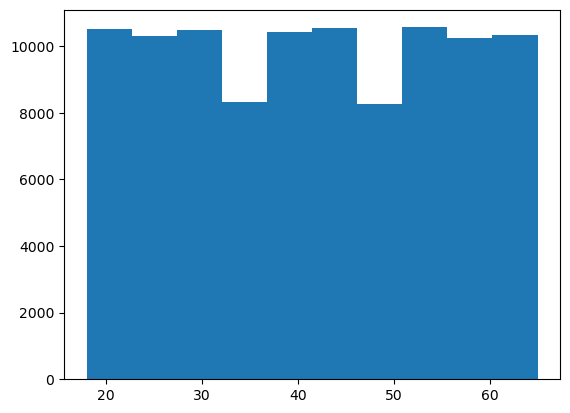

In [49]:
plt.hist(train['Age'])

<Axes: xlabel='Age', ylabel='Density'>

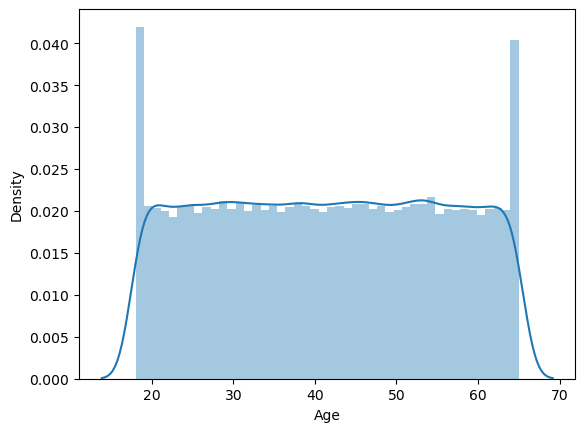

In [50]:
sns.distplot(train.Age)

## Gender

[Text(0, 0, '50052'), Text(0, 0, '49948')]

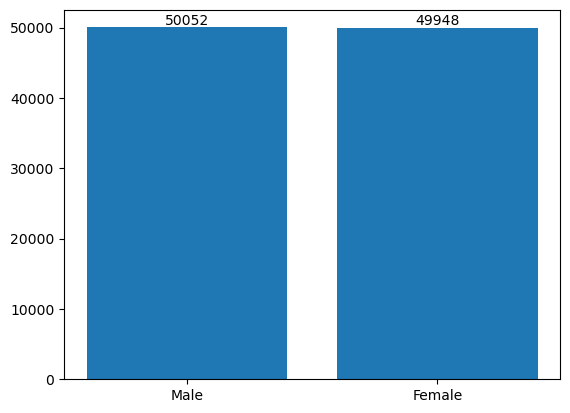

In [52]:
y_axis = train['Gender'].value_counts()
x_axis = ['Male','Female']
bars = plt.bar(x_axis,y_axis)
plt.bar_label(bars)

## Family History

[Text(0, 0, '50042'), Text(0, 0, '49958')]

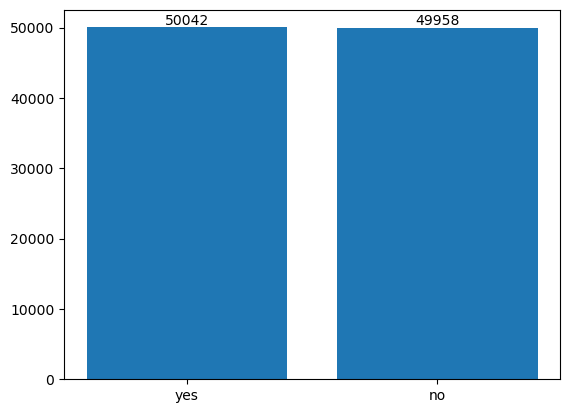

In [54]:
y_axis = train['Family History'].value_counts()
x_axis = ['yes','no']
bars = plt.bar(x_axis,y_axis)
plt.bar_label(bars)

## Personal History

[Text(0, 0, '50210'), Text(0, 0, '49790')]

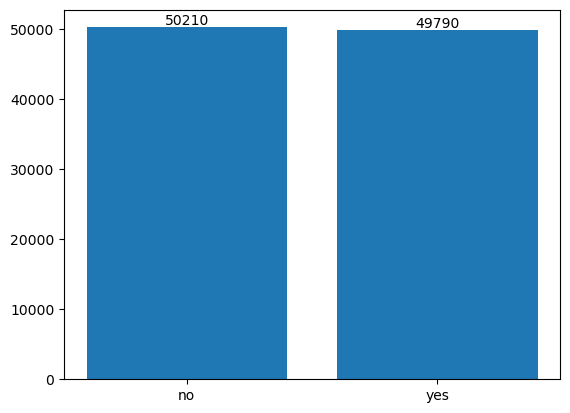

In [56]:
y_axis = train['Personal History'].value_counts()
x_axis = ['no','yes']
bars = plt.bar(x_axis,y_axis)
plt.bar_label(bars)

## Current Stressors

[Text(0, 0, '33409'), Text(0, 0, '33369'), Text(0, 0, '33222')]

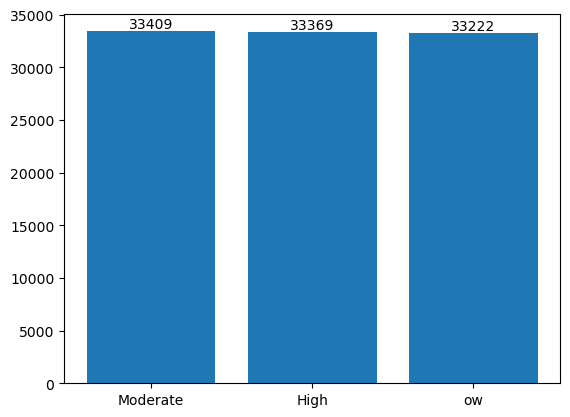

In [58]:
y_axis = train['Current Stressors'].value_counts()
x_axis = ['Moderate','High','ow']
bars = plt.bar(x_axis,y_axis)
plt.bar_label(bars)